# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from keras.models import Sequential, load_model
from keras.utils import to_categorical
from PIL import Image

Using TensorFlow backend.


# Retrieving the images and their labels

The images along with their labels must be retrieved from the datasets...

In [2]:
data=[]
labels=[]
classes=43
current_path=os.getcwd()

for i in range(classes):
    path=os.path.join(current_path,'train',str(i))
    images=os.listdir(path)
    
    for a in images:
        try:
            image=Image.open(path+'\\'+a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('Error in finding Image')
            

 # Converting list into array of numpy
 As the data and labels are formed as lists, we need to convert into arrays for the further work...

In [3]:
data=np.array(data)
labels=np.array(labels)

print(data.shape)
print(labels.shape)


(39209, 30, 30, 3)
(39209,)


# Splitting into train and test set

The retrieved data is stored in data and labels which are in the form of arrays. Now the entire acquired data must be splitted into training set and testing set.

In [4]:
x_train, x_test, y_train, y_test= train_test_split(data, labels, test_size=0.2, random_state=42)

In [5]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


As we have splitted the dataset into train and test set in 80% and 20% respectively, the above are the sizes of those train and test set

# Converting the labels

The labels of the images must be converted using One hot encoding

In [6]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Once the required preprocessing is done, let's enter into the main part i.e 

# Building a model

A model to detect the various traffic signs must be built using Convolutional Neural Network

In [9]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

Compilation of the above developed model using cross entropy and adam optimizer

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

As the compilation is successful , we will save this model for future use to work on new images

In [11]:
epochs=15
history=model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))
model.save('tsd.h5')

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 142s 5ms/step - loss: 1.9544 - accuracy: 0.5093 - val_loss: 0.5878 - val_accuracy: 0.8585
Epoch 2/15
31367/31367 [==============================] - 141s 4ms/step - loss: 0.7818 - accuracy: 0.7694 - val_loss: 0.2735 - val_accuracy: 0.9318
Epoch 3/15
31367/31367 [==============================] - 138s 4ms/step - loss: 0.5589 - accuracy: 0.8350 - val_loss: 0.1825 - val_accuracy: 0.9513
Epoch 4/15
31367/31367 [==============================] - 139s 4ms/step - loss: 0.4252 - accuracy: 0.8741 - val_loss: 0.1292 - val_accuracy: 0.9605
Epoch 5/15
31367/31367 [==============================] - 145s 5ms/step - loss: 0.3631 - accuracy: 0.8925 - val_loss: 0.1047 - val_accuracy: 0.9689
Epoch 6/15
31367/31367 [==============================] - 145s 5ms/step - loss: 0.3181 - accuracy: 0.9073 - val_loss: 0.1139 - val_accuracy: 0.9660
Epoch 7/15
31367/31367 [==============================] - 144s 

# Plotting the graph 

Plotting a graph to represent the accuracy

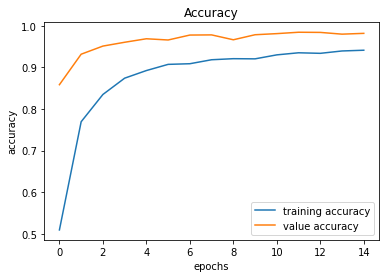

In [13]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='value accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

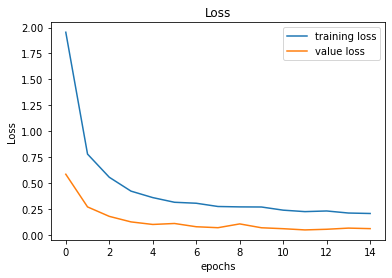

In [14]:
plt.figure(0)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='value loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing accuracy on Test set

Let's know the accuracy on the test set

In [19]:
y_test= pd.read_csv('Test.csv')

ids=y_test['ClassId'].values
imgs=y_test['Path'].values

data=[]
for i in imgs:
    image=Image.open(i)
    image=image.resize((30,30))
    data.append(np.array(image))
    
x_test=np.array(data)
pred=model.predict_classes(x_test)

print(accuracy_score(ids, predict))

0.9389548693586698


Yep!!! Finally the accuracy is 94%